# <center> FP1–V7. Modul torzije i torzijske oscilacije <center/>
### <center> Matija Pajas <center/>

In [1]:
from scipy import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#from sympy import *
#init_printing()

from IPython.display import HTML
from IPython.display import display

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Pokaži/sakrij kod"></form>''')

In [3]:
display(HTML("""
<style>
.output {
    display: block;
    align-items: center;
    text-align: center;
}
td {
  text-align: center;
  vertical-align: middle;
}
</style>
"""))

## Cilj vježbe

Cilj ove vježbe je proučiti kako se ponašaju različiti materijali pod torzijskim opterećenjem te izmjeriti njihove module torzije. Jednom kada su moduli torzije tijela izmjereni koristimo relaciju ovisnosti modula torzije o modulu smicanja i geometriji tijela kako bismo kao glavni cilj ove vježbe odredili module smicanja materijala.

## Mjerenje i pokus

Mjerni uređaji sastoje se od kružne ploče kojoj je skala podjeljena na stupnjeve. Na nju se mogu pričvrstiti šipke od različitih materijala koje dovodimo pod torzijsko opterećenje zakretanjem drvene letvice nad dnu konstrukcije za koje su zakačene. Kako bismo povećali moment inercije cijele konstrukcije imamo utege koje možemo postaviti na krajeve spomenute letvice. Za prvi dio pokusa koristimo dinamometar, a periode oscilacija mjerimo štopericom.

## Zadatak 1

Potrebno je izmjeriti modul torzije čelične šipke statičkom metodom, te to napraviti za 8 kutova od $5^\circ$ do $40^\circ$. To znači da ću dinamometrom zakrenuti letvicu do svakog od tih kutova te očitati silu koju sam primjenio. Bitno je naglasiti da dinamometar moramo držati okomitim na letvicu jer kako je riječ o vektorskom produktu želimo da je sinus jednak 1 i izraz $\vec{M} = \vec{r} \times \vec{F}$ svede na samo $M = Fr$.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;"></th>
      <th style="min-width: 12;">$\varphi$ / $\mathrm{^\circ}$</th>
      <th style="min-width: 12;">$r$ / $\mathrm{m}$</th>
      <th style="min-width: 12;">$F$ / $\mathrm{N}$</th>
      <th style="min-width: 12;">$M$ / $\mathrm{Nm}$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">1</th>
      <td>5</td>
      <td>0,125</td>
      <td>0,04</td>
      <td>0,00500</td>
    </tr>
    <tr>
      <th style="min-width: 12;">2</th>
      <td>10</td>
      <td>0,125</td>
      <td>0,22</td>
      <td>0,02750</td>
    </tr>
    <tr>
      <th style="min-width: 12;">3</th>
      <td>15</td>
      <td>0,125</td>
      <td>0,37</td>
      <td>0,04625</td>
    </tr>
    <tr>
      <th style="min-width: 12;">4</th>
      <td>20</td>
      <td>0,125</td>
      <td>0,55</td>
      <td>0,06875</td>
    </tr>
    <tr>
      <th style="min-width: 12;">5</th>
      <td>25</td>
      <td>0,125</td>
      <td>0,68</td>
      <td>0,08500</td>
    </tr>
    <tr>
      <th style="min-width: 12;">6</th>
      <td>30</td>
      <td>0,125</td>
      <td>0,77</td>
      <td>0,09625</td>
    </tr>
    <tr>
      <th style="min-width: 12;">7</th>
      <td>35</td>
      <td>0,125</td>
      <td>0,92</td>
      <td>0,11500</td>
    </tr>
    <tr>
      <th style="min-width: 12;">8</th>
      <td>40</td>
      <td>0,125</td>
      <td>1,40</td>
      <td>0,17500</td>
    </tr>
  </tbody>
</table>

In [4]:
r = [0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]
F = [0.04,0.22,0.37,0.55,0.68,0.77,0.92,1.4]

d = {r"$\varphi$ / $\mathrm{^\circ}$": [5,10,15,20,25,30,35,40],
     "$r$ / $\mathrm{m}$": r,
     "$F$ / $\mathrm{N}$": F,
     "$M$ / $\mathrm{Nm}$": [x*y for x,y in zip(r,F)]}
df = pd.DataFrame(data=d, index=range(1,9))
#dftohtml = df.to_html(col_space=12,decimal=",")
#print(dftohtml)
means = df.mean(0)
devs = df.std(0)
uncs = devs/sqrt(5)
df2 = pd.DataFrame([(str(means[i]) + " ± " + str(uncs[i])) for i in range(len(means))],index=list(means.keys()),columns=["Iznosi"])

In [5]:
#df2

a = 0.0042708333311616276 ± 0.00039389668974459133
b = -0.018750000002234257 ± 0.009945403906070216


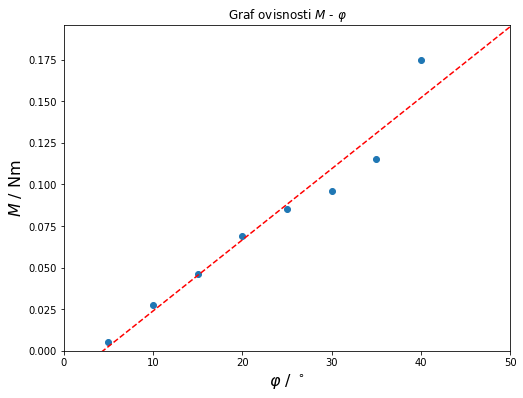


Linearnom regresijom možemo odrediti iznos modula torzije, ako je jednadžba pravca u obliku

$$ y = ax + b $$

Iz zadanog izraza

$$\vec{M} = D_T \vec{\varphi} + const  $$

možemo prepoznati


$$
\begin{align}
y &= M \\
x &= \varphi \\
a &= D_t \\
b &= const
\end{align}
$$

Te kao rezultat dobivamo

$$D_t = (43 \pm 4) \times 10^{-4} \ \mathrm{Nm \cdot deg^{-1}}$$

Ono što se može primjetiti na grafu je da točke odmiču od pravca kako se krećemo prema većim kutevima. Razlog tomu je što je bilo jako teško mjeriti sa dinamometrom. Na trenutke nije radio ispravno te sam ga mogao pomicati naprijed-nazad bez promjene u otklonu. Što je bio veći kut greške očitavanja zbog toga su postajale veće.

## Zadatak 2

U ovom zadatku mjerio sam period oscilacija sustava koji se sastoji od čelične šipke i letvice s utezima u svrhu određivanja momenta tromosti. Kako bih bolje odredio vrijeme perioda oscilacija pustio sam sustav da oscilira deset puta te to vrijeme podijelio sa 10.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;"></th>
      <th style="min-width: 12;">$T_{10}$ / $\mathrm{s}$</th>
      <th style="min-width: 12;">$T$ / $\mathrm{s}$</th>
      <th style="min-width: 12;">$I$ / $\mathrm{kgm^2}$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">1</th>
      <td>12,91</td>
      <td>1,291</td>
      <td>0,000182</td>
    </tr>
    <tr>
      <th style="min-width: 12;">2</th>
      <td>12,79</td>
      <td>1,279</td>
      <td>0,000178</td>
    </tr>
    <tr>
      <th style="min-width: 12;">3</th>
      <td>12,85</td>
      <td>1,285</td>
      <td>0,000180</td>
    </tr>
    <tr>
      <th style="min-width: 12;">4</th>
      <td>12,75</td>
      <td>1,275</td>
      <td>0,000177</td>
    </tr>
    <tr>
      <th style="min-width: 12;">5</th>
      <td>12,85</td>
      <td>1,285</td>
      <td>0,000180</td>
    </tr>
    <tr>
      <th style="min-width: 12;">6</th>
      <td>12,78</td>
      <td>1,278</td>
      <td>0,000178</td>
    </tr>
    <tr>
      <th style="min-width: 12;">7</th>
      <td>12,80</td>
      <td>1,280</td>
      <td>0,000178</td>
    </tr>
    <tr>
      <th style="min-width: 12;">8</th>
      <td>12,81</td>
      <td>1,281</td>
      <td>0,000179</td>
    </tr>
    <tr>
      <th style="min-width: 12;">9</th>
      <td>12,79</td>
      <td>1,279</td>
      <td>0,000178</td>
    </tr>
    <tr>
      <th style="min-width: 12;">10</th>
      <td>12,76</td>
      <td>1,276</td>
      <td>0,000177</td>
    </tr>
  </tbody>
</table>

Kako bih odredio moment inercije koristim izraz niže te računam njegovu nepouzdanost pomoću podataka iz tablice iznad.

In [20]:
T10 = [12.91,12.79,12.85,12.75,12.85,12.78,12.80,12.81,12.79,12.76]
T = [t/10 for t in T10]

d = {"$T_{10}$ / $\mathrm{s}$": T10,
     "$T$ / $\mathrm{s}$": T,
     "$I$ / $\mathrm{kgm^2}$": [0.0043*(t/(2*np.pi))**2 for t in T]}
df = pd.DataFrame(data=d, index=range(1,11))
#dftohtml = df.to_html(col_space=12,decimal=",")
#print(dftohtml)
means = df.mean(0)
devs = df.std(0)
uncs = devs/sqrt(5)
df2 = pd.DataFrame([(str(means[i]) + " ± " + str(uncs[i])) for i in range(len(means))],index=list(means.keys()),columns=["Iznosi"])
df

,$T_{10}$ / $\mathrm{s}$,$T$ / $\mathrm{s}$,$I$ / $\mathrm{kgm^2}$
1,12.91,1.291,0.000182
2,12.79,1.279,0.000178
3,12.85,1.285,0.000180
4,12.75,1.275,0.000177
5,12.85,1.285,0.000180
6,12.78,1.278,0.000178
7,12.80,1.280,0.000178
8,12.81,1.281,0.000179
9,12.79,1.279,0.000178
10,12.76,1.276,0.000177


In [8]:
df2

,Iznosi
$T_{10}$ / $\mathrm{s}$,12.808999999999997 ± 0.021648710508172728
$T$ / $\mathrm{s}$,1.2809 ± 0.0021648710508172615
$I$ / $\mathrm{kgm^2}$,0.00017870831198718793 ± 6.049708272719837e-07


In [9]:
#T,Dt,Mt,Md = symbols("T,D_t,M_t,M_D_t")
#I = Function("I")(T,Dt)
#display(sqrt((I.diff(T)*Mt)**2 + (I.diff(Dt)*Md)**2))
#I = Dt*(T/(2*pi))**2
#display(I)
#display(I.subs([(Dt,0.0043),(T,1.2809)]).evalf())
#display(sqrt((I.diff(T)*Mt)**2 + (I.diff(Dt)*Md)**2))
#display(sqrt((I.diff(T)*Mt)**2 + (I.diff(Dt)*Md)**2).subs([(T,1.2809), (Mt,0.003), (Dt,0.0043), (Md,0.0004)]).evalf())

$$T = 2\pi\sqrt{\frac{I}{D_t}}$$

$$\overline{I} = \overline{D_t} \Big( \frac{\overline{T}}{2\pi} \Big)^2 = 0,000178706014858643 \ \mathrm{kgm^2}$$

$$
\begin{align}
M_I & = \sqrt{M_{D t}^{2} \left(\frac{\partial}{\partial D_{t}} I{\left (T,D_{t} \right )}\right)^{2} + M_{t}^{2} \left(\frac{\partial}{\partial T} I{\left (T,D_{t} \right )}\right)^{2}} \\
M_I & = \sqrt{\frac{D_{t}^{2} M_{t}^{2} T^{2}}{4 \pi^{4}} + \frac{M_{D t}^{2} T^{4}}{16 \pi^{4}}} \\
M_I & = \frac{D_{t} T^{2}}{4 \pi^{2}} \sqrt{\frac{4 M_{t}^{2}}{ T^{2} } + \frac{M_{D t}^{2}}{D_t^2}} \\
M_I & = 1,66448780649361 \times 10^{-5} \ \mathrm{kgm^2}
\end{align}
$$

$$I = (18 \pm 4) \times 10^{-5} \ \mathrm{kgm^2}$$

Sada kada je moment tromosti izračunat, možemo koristiti isti moment tromosti za sva iduća tijela jer su jako malog radijusa i njihov doprinost momentu tromosti možemo zanemariti u usporedbi sa utezima na kraju letvica. Upravo to se radi u idućem zadatku.

## Zadatak 3

Cilj ovog zadatka je izmeriti period torzijskih oscilacija aluminijske, bakrene i mjedene šipke istih dimenzija koje su zapisane niže. Računam ih na jednak način kao u prethodnom zadatku pomoću podataka iz tablice niže, te nakon toga računam module smicanja za svako tijelo preko izraza ovisnosti modula torzije o modulu smicanja i geometriji tijela.

In [10]:
#T,Dt,Mt,Md,MI,i = symbols("T,D_t,M_t,M_D_t,M_I,I")
#Dt = Function("D_t")(T,i)
#display(sqrt((Dt.diff(T)*Mt)**2 + (Dt.diff(i)*MI)**2))
#Dt = i*(T/(2*pi))**(-2)
#display(Dt)
##čelik
#display(Dt.subs([(i,0.000178706014858643),(T,1.2809)]).evalf())
##aluminij
#display(Dt.subs([(i,0.000178706014858643),(T,2.2314)]).evalf())
##bakar
#display(Dt.subs([(i,0.000178706014858643),(T,1.7571999999999999)]).evalf())
##mjed
#display(Dt.subs([(i,0.000178706014858643),(T,1.8760000000000001)]).evalf())

#display(sqrt((Dt.diff(T)*Mt)**2 + (Dt.diff(i)*MI)**2))
##čelik
#display(sqrt((Dt.diff(T)*Mt)**2 + (Dt.diff(i)*MI)**2).subs([(T,1.2809), (Mt,0.00096815976642976*sqrt(5)), (i,0.000178706014858643),(MI,0.0000166448780649361)]).evalf())
##Aluminij
#display(sqrt((Dt.diff(T)*Mt)**2 + (Dt.diff(i)*MI)**2).subs([(T,2.2314), (Mt,0.00120498962651138*sqrt(5)), (i,0.000178706014858643),(MI,0.0000166448780649361)]).evalf())
##Bakar
#display(sqrt((Dt.diff(T)*Mt)**2 + (Dt.diff(i)*MI)**2).subs([(T,1.7571999999999999), (Mt,0.002863564212655211), (i,0.000178706014858643),(MI,0.0000166448780649361)]).evalf())
##Mjed
#display(sqrt((Dt.diff(T)*Mt)**2 + (Dt.diff(i)*MI)**2).subs([(T,1.8760000000000001), (Mt,0.002863564212655211), (i,0.000178706014858643),(MI,0.0000166448780649361)]).evalf())
#init_printing(pretty_print=False)

### Čelik

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;"></th>
      <th style="min-width: 12;">$T_{10}$ / $\mathrm{s}$</th>
      <th style="min-width: 12;">$T$ / $\mathrm{s}$</th>
      <th style="min-width: 12;">$D_t$ / $\mathrm{Nm \cdot deg^{-1}}$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">1</th>
      <td>12,91</td>
      <td>1,291</td>
      <td>0,409534</td>
    </tr>
    <tr>
      <th style="min-width: 12;">2</th>
      <td>12,79</td>
      <td>1,279</td>
      <td>0,417255</td>
    </tr>
    <tr>
      <th style="min-width: 12;">3</th>
      <td>12,85</td>
      <td>1,285</td>
      <td>0,413367</td>
    </tr>
    <tr>
      <th style="min-width: 12;">4</th>
      <td>12,75</td>
      <td>1,275</td>
      <td>0,419877</td>
    </tr>
    <tr>
      <th style="min-width: 12;">5</th>
      <td>12,85</td>
      <td>1,285</td>
      <td>0,413367</td>
    </tr>
    <tr>
      <th style="min-width: 12;">6</th>
      <td>12,78</td>
      <td>1,278</td>
      <td>0,417908</td>
    </tr>
    <tr>
      <th style="min-width: 12;">7</th>
      <td>12,80</td>
      <td>1,280</td>
      <td>0,416603</td>
    </tr>
    <tr>
      <th style="min-width: 12;">8</th>
      <td>12,81</td>
      <td>1,281</td>
      <td>0,415953</td>
    </tr>
    <tr>
      <th style="min-width: 12;">9</th>
      <td>12,79</td>
      <td>1,279</td>
      <td>0,417255</td>
    </tr>
    <tr>
      <th style="min-width: 12;">10</th>
      <td>12,76</td>
      <td>1,276</td>
      <td>0,419219</td>
    </tr>
  </tbody>
</table>

$$ D_t = \frac{4 \overline{I}}{\overline{T}^{2}} \pi^{2} = 0,00430000000000001 \ \mathrm{Nm \cdot deg^{-1}} $$

$$
\begin{align}
M_{D_t} & = \sqrt{M_{I}^{2} \left(\frac{\partial}{\partial I} \operatorname{D_{t}}{\left (T,I \right )}\right)^{2} + M_{t}^{2} \left(\frac{\partial}{\partial T} \operatorname{D_{t}}{\left (T,I \right )}\right)^{2}} \\
M_{D_t} & = \sqrt{\frac{64 \pi^{4}}{T^{6}} I^{2} M_{t}^{2} + \frac{16 \pi^{4}}{T^{4}} M_{I}^{2}} \\
M_{D_t} & = \frac{4 I}{T^{2}} \pi^{2}\sqrt{\frac{4 M_{t}^{2}}{T^{2}} + \frac{ M_{I}^{2}}{I^2}} \\
M_{D_t} & = 0,000400770470636391 \ \mathrm{Nm \cdot deg^{-1}}
\end{align}
$$

$$M_{D_t} = (43 \pm 4) \times 10^{-4} \ \mathrm{Nm \cdot deg^{-1}}$$

$L = 0.5 \mathrm{m}$

$R = 0.001 \mathrm{m}$

$$G = D_t \frac{2L}{\pi R^4} \approx 1,37 \ \mathrm{GPa}$$

In [11]:
T10 = [12.91,12.79,12.85,12.75,12.85,12.78,12.80,12.81,12.79,12.76]
T = [t/10 for t in T10]

d = {"$T_{10}$ / $\mathrm{s}$": T10,
     "$T$ / $\mathrm{s}$": T,
     "$D_t$ / $\mathrm{Nm \cdot deg^{-1}}$": [0.017289515719339673*(t/(2*np.pi))**(-2) for t in T]}
df = pd.DataFrame(data=d, index=range(1,11))
#dftohtml = df.to_html(col_space=12,decimal=",")
#print(dftohtml)
means = df.mean(0)
devs = df.std(0)
uncs = devs/sqrt(5)
df2 = pd.DataFrame([(str(means[i]) + " ± " + str(uncs[i])) for i in range(len(means))],index=list(means.keys()),columns=["Iznosi"])
#df

In [19]:
df2

,Iznosi
$T_{10}$ / $\mathrm{s}$,18.76 ± 0.028635642126552344
$T$ / $\mathrm{s}$,1.8760000000000001 ± 0.002863564212655211
$D_t$ / $\mathrm{Nm \cdot deg^{-1}}$,0.19394966391508725 ± 0.0005916142589128379


### Aluminij

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;"></th>
      <th style="min-width: 12;">$T_{10}$ / $\mathrm{s}$</th>
      <th style="min-width: 12;">$T$ / $\mathrm{s}$</th>
      <th style="min-width: 12;">$D_t$ / $\mathrm{Nm \cdot deg^{-1}}$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">1</th>
      <td>22,35</td>
      <td>2,235</td>
      <td>0,136643</td>
    </tr>
    <tr>
      <th style="min-width: 12;">2</th>
      <td>22,34</td>
      <td>2,234</td>
      <td>0,136765</td>
    </tr>
    <tr>
      <th style="min-width: 12;">3</th>
      <td>22,22</td>
      <td>2,222</td>
      <td>0,138247</td>
    </tr>
    <tr>
      <th style="min-width: 12;">4</th>
      <td>22,37</td>
      <td>2,237</td>
      <td>0,136399</td>
    </tr>
    <tr>
      <th style="min-width: 12;">5</th>
      <td>22,29</td>
      <td>2,229</td>
      <td>0,137380</td>
    </tr>
  </tbody>
</table>

$$ M_{D_t} = (14 \pm 1) \times 10^{-4} \ \mathrm{Nm \cdot deg^{-1}}  $$

$$G = D_t \frac{2L}{\pi R^4} \approx 0,446 \ \mathrm{GPa}$$

In [13]:
T10 = [22.35,22.34,22.22,22.37,22.29]
T = [t/10 for t in T10]

d = {"$T_{10}$ / $\mathrm{s}$": T10,
     "$T$ / $\mathrm{s}$": T,
     "$D_t$ / $\mathrm{Nm \cdot deg^{-1}}$": [0.017289515719339673*(t/(2*np.pi))**(-2) for t in T]}
df = pd.DataFrame(data=d, index=range(1,6))
#dftohtml = df.to_html(col_space=12,decimal=",")
#print(dftohtml)
means = df.mean(0)
devs = df.std(0)
uncs = devs/sqrt(5)
df2 = pd.DataFrame([(str(means[i]) + " ± " + str(uncs[i])) for i in range(len(means))],index=list(means.keys()),columns=["Iznosi"])
#df

In [14]:
#df2

### Bakar

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;"></th>
      <th style="min-width: 12;">$T_{10}$ / $\mathrm{s}$</th>
      <th style="min-width: 12;">$T$ / $\mathrm{s}$</th>
      <th style="min-width: 12;">$D_t$ / $\mathrm{Nm \cdot deg^{-1}}$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">1</th>
      <td>17,38</td>
      <td>1,738</td>
      <td>0,225966</td>
    </tr>
    <tr>
      <th style="min-width: 12;">2</th>
      <td>17,57</td>
      <td>1,757</td>
      <td>0,221105</td>
    </tr>
    <tr>
      <th style="min-width: 12;">3</th>
      <td>17,56</td>
      <td>1,756</td>
      <td>0,221357</td>
    </tr>
    <tr>
      <th style="min-width: 12;">4</th>
      <td>17,66</td>
      <td>1,766</td>
      <td>0,218857</td>
    </tr>
    <tr>
      <th style="min-width: 12;">5</th>
      <td>17,69</td>
      <td>1,769</td>
      <td>0,218116</td>
    </tr>
  </tbody>
</table>

$$M_{D_t} = (23 \pm 2) \times 10^{-4} \ \mathrm{Nm \cdot deg^{-1}}$$

$$G = D_t \frac{2L}{\pi R^4} \approx 0,732 \ \mathrm{GPa}$$

In [15]:
T10 = [17.38,17.57,17.56,17.66,17.69]
T = [t/10 for t in T10]

d = {"$T_{10}$ / $\mathrm{s}$": T10,
     "$T$ / $\mathrm{s}$": T,
     "$D_t$ / $\mathrm{Nm \cdot deg^{-1}}$": [0.017289515719339673*(t/(2*np.pi))**(-2) for t in T]}
df = pd.DataFrame(data=d, index=range(1,6))
#dftohtml = df.to_html(col_space=12,decimal=",")
#print(dftohtml)
means = df.mean(0)
devs = df.std(0)
uncs = devs/sqrt(5)
df2 = pd.DataFrame([(str(means[i]) + " ± " + str(uncs[i])) for i in range(len(means))],index=list(means.keys()),columns=["Iznosi"])
#df

In [16]:
#df2

### Mjed

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;"></th>
      <th style="min-width: 12;">$T_{10}$ / $\mathrm{s}$</th>
      <th style="min-width: 12;">$T$ / $\mathrm{s}$</th>
      <th style="min-width: 12;">$D_t$ / $\mathrm{Nm \cdot deg^{-1}}$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">1</th>
      <td>18,81</td>
      <td>1,881</td>
      <td>0,192915</td>
    </tr>
    <tr>
      <th style="min-width: 12;">2</th>
      <td>18,84</td>
      <td>1,884</td>
      <td>0,192301</td>
    </tr>
    <tr>
      <th style="min-width: 12;">3</th>
      <td>18,69</td>
      <td>1,869</td>
      <td>0,195400</td>
    </tr>
    <tr>
      <th style="min-width: 12;">4</th>
      <td>18,71</td>
      <td>1,871</td>
      <td>0,194982</td>
    </tr>
    <tr>
      <th style="min-width: 12;">5</th>
      <td>18,75</td>
      <td>1,875</td>
      <td>0,194151</td>
    </tr>
  </tbody>
</table>

$$M_{D_t} = (20 \pm 2) \times 10^{-4} \ \mathrm{Nm \cdot deg^{-1}}$$

$$G = D_t \frac{2L}{\pi R^4} \approx 0,637 \ \mathrm{GPa}$$

## Zaključak

Ovaj pokus zahtjevao je pažljivo namještanje i učvršćivanje šipki jer ih je jako lako saviti. To se često događalo i zbog toga su mjerenja i očivatavanja bila dosta otežana. Dinamometri nisu baš najispravnije radili no usprkos tome uspio sam dobiti konzistentne rezultate za različite materijale te smo time pokazali kako se torzijske oscilacije mogu koristiti za određivanje modula smicanja na kreativan indirektan način.

In [17]:
T10 = [18.81,18.84,18.69,18.71,18.75]
T = [t/10 for t in T10]

d = {"$T_{10}$ / $\mathrm{s}$": T10,
     "$T$ / $\mathrm{s}$": T,
     "$D_t$ / $\mathrm{Nm \cdot deg^{-1}}$": [0.017289515719339673*(t/(2*np.pi))**(-2) for t in T]}
df = pd.DataFrame(data=d, index=range(1,6))
#dftohtml = df.to_html(col_space=12,decimal=",")
#print(dftohtml)
means = df.mean(0)
devs = df.std(0)
uncs = devs/sqrt(5)
df2 = pd.DataFrame([(str(means[i]) + " ± " + str(uncs[i])) for i in range(len(means))],index=list(means.keys()),columns=["Iznosi"])
#df

In [18]:
#df2